# DIGS 20006/30006 : NLP Project

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
#coding=utf-8
import jieba
import nltk
import zh_core_web_sm
import os
import sys

In [3]:
#imports and set up logging
import gensim 
import logging
import glob, os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
#directory containing all source texts for training the model 
my_dir="/Users/tianchushu/Desktop/NLP/corpus/"

doc = []
os.chdir(my_dir)

for filename in glob.glob("*.txt"):
    filedata = open(filename, 'r').read()
    print(filename + " = " + str(len(filedata)) + " chars") 
    doc.append(filedata)

nalan.txt = 8939 chars
liuyong.txt = 827 chars
liqingzhao.txt = 4289 chars
ouyangxiu.txt = 647 chars
qinguan.txt = 583 chars
sushi.txt = 1105 chars
xinqingji.txt = 8958 chars
yanshu.txt = 785 chars


In [5]:
name = {}
poets = ['纳兰', '柳永', '李清照', '欧阳修', '秦观', '苏轼', '辛弃疾', "晏殊"]
for i in range(8):
    name[i] = poets[i]

In [6]:
df = pd.DataFrame(doc)
df.columns = ['content']

In [7]:
df['poet'] =  pd.Series(name)

In [8]:
df

,content,poet
0,金缕曲亡妇忌日有感\n此恨何时已。滴空阶、寒更雨歇，葬花天气。三载悠悠魂梦杳，是梦久应醒矣。...,纳兰
1,曲玉管\n陇首云飞，江边日晚，烟波满目凭栏久。一望关河萧索，千里清秋。忍凝眸。杳杳神京，盈盈...,柳永
2,如梦令\n常记溪亭日暮，\n沉醉不知归路。\n兴尽晚回舟，\n误入藕花深处。\n争渡，争渡，...,李清照
3,采桑子\n群芳过后西湖好，狼藉残红，飞絮，垂柳栏杆尽日风。笙歌散尽游人去，始觉春空，垂下帘栊...,欧阳修
4,望海潮\n梅英疏淡，冰溶泄，东风暗换年华。金谷俊游，铜驼巷陌，新晴细履平沙。长记误随车。正絮...,秦观
5,水调歌头\n明月几时有，把酒问青天。不知天上宫阙，今夕是何年。我欲乘风归去，惟恐琼楼玉宇，高...,苏轼
6,生查子\n游雨岩溪边照影行，天在清溪底。天上有行云，人在行云里。\n高歌谁和余？空谷清音起。...,辛弃疾
7,浣溪沙\n一曲新词酒一杯，去年天气旧池台，夕阳西下几时回?无可奈何花落去，似曾相识燕归来，小...,晏殊


In [9]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [10]:
df["content_cutted"] = df.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
2019-03-12 22:37:28,115 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0d/k2cqq0217yl4b1cg6yyg6gh80000gn/T/jieba.cache
2019-03-12 22:37:28,124 : DEBUG : Loading model from cache /var/folders/0d/k2cqq0217yl4b1cg6yyg6gh80000gn/T/jieba.cache
Loading model cost 0.826 seconds.
2019-03-12 22:37:28,946 : DEBUG : Loading model cost 0.826 seconds.
Prefix dict has been built succesfully.
2019-03-12 22:37:28,947 : DEBUG : Prefix dict has been built succesfully.


In [11]:
df.content_cutted.head()

0    金缕 曲亡妇 忌日 有感 \n 此恨 何时 已 。 滴 空阶 、 寒 更 雨 歇 ， 葬花 ...
1    曲玉管 \n 陇首云飞 ， 江边 日晚 ， 烟波 满目 凭栏 久 。 一望 关河 萧索 ， ...
2    如梦令 \n 常记溪亭 日暮 ， \n 沉醉 不知 归路 。 \n 兴尽晚 回舟 ， \n ...
3    采桑子 \n 群芳 过后 西湖 好 ， 狼藉 残红 ， 飞絮 ， 垂柳 栏杆 尽日风 。 笙...
4    望 海潮 \n 梅英 疏淡 ， 冰溶泄 ， 东风 暗换 年华 。 金谷 俊游 ， 铜驼 巷陌...
Name: content_cutted, dtype: object

In [12]:
df["content_cutted"] = df["content_cutted"].replace('\t', '')
df["content_cutted"] = df["content_cutted"].replace('\n', '')
df["content_cutted"] = df["content_cutted"].replace('\u3000', '')

In [13]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.content_cutted.values.tolist()
for d in data:
    d = re.sub(r'[^\w\s\d]',' ', d) 
data_words = list(sent_to_words(data))
print(data_words[:1])

[['金缕', '曲亡妇', '忌日', '有感', '此恨', '何时', '空阶', '葬花', '天气', '三载', '悠悠', '梦久', '应醒', '人间', '无味', '不及', '夜台', '尘土', '冷清清', '一片', '埋愁', '抛弃', '重泉', '双鱼', '好知', '苦乐', '自中宵成', '转侧', '忍听', '弦重', '结个', '生知', '还怕', '两人', '薄命', '再缘', '剩月', '零风里', '清泪', '纸灰', '水调歌头', '西山', '秋爽', '空山', '梵呗', '月影', '悠然', '一境', '人外', '不许', '尘侵', '岁晚', '游处', '犹记', '半竿', '斜照', '一抹', '疏林', '绝顶', '茅庵', '老衲', '正孤吟', '云中', '溪头', '边琴', '此生', '著岁', '两屐', '谁识', '卧游', '准拟', '乘风', '归去', '错向', '槐安', '回首', '何日', '投簪', '布袜青鞋', '画图', '明月', '孤舟', '海淀', '一片', '亭亭', '空凝', '西风', '霓裳', '偏舞', '白鸟', '惊飞', '蒲叶乱', '断续', '浣纱', '丹碧驳', '秋夜', '风吹', '采菱', '越女', '辘轳', '声断', '昏鸦', '多少', '博山', '情绪', '昭君', '雨丝', '丝吹湿', '倦柳愁', '荷风急', '瘦骨', '不禁', '总成', '别有', '心情', '怎说', '诉愁', '时节', '梦须', '沁园春', '瞬息', '浮生', '薄命', '低徊', '怎忘', '记绣', '闲时', '戏雨', '雕阑曲处', '同倚', '斜阳', '梦好', '难留', '残莫续', '赢得', '更深', '一场', '遗容', '只灵飙', '一转', '未许', '端详', '重寻', '碧落', '茫茫', '短发', '朝来定', '人间天上', '尘缘', '未断', '春花', '秋叶', '触绪', '欲结', '绸缪', '翻惊', '摇落', '减尽', '荀衣', '昨日', '无奈', '声声', '邻笛

In [14]:
stop_words = ['浣溪沙','满江红','沁园春', '浪淘沙', '卜算子','相见欢','望海潮', '金缕曲','曲玉管','水调歌头', '贺新郎','清平乐','如梦令', '采桑子','踏莎行', '虞美人','临江仙', '梦江南','诉衷情', '浪淘沙', '一剪梅', '蝶恋花', '满庭芳', '木兰花', '鹧鸪天', '青玉案', '南乡子', '生查子','菩萨蛮', '的', '了', '和', '是', '就', '都', '而', '及', '与', '着', '或',  '是否']

In [15]:
def remove_stopwords(texts):
    return [[item for item in law_tokenized if item not in stop_words] for law_tokenized in texts]
    #return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [16]:
data_words_nostops

[['金缕',
  '曲亡妇',
  '忌日',
  '有感',
  '此恨',
  '何时',
  '空阶',
  '葬花',
  '天气',
  '三载',
  '悠悠',
  '梦久',
  '应醒',
  '人间',
  '无味',
  '不及',
  '夜台',
  '尘土',
  '冷清清',
  '一片',
  '埋愁',
  '抛弃',
  '重泉',
  '双鱼',
  '好知',
  '苦乐',
  '自中宵成',
  '转侧',
  '忍听',
  '弦重',
  '结个',
  '生知',
  '还怕',
  '两人',
  '薄命',
  '再缘',
  '剩月',
  '零风里',
  '清泪',
  '纸灰',
  '西山',
  '秋爽',
  '空山',
  '梵呗',
  '月影',
  '悠然',
  '一境',
  '人外',
  '不许',
  '尘侵',
  '岁晚',
  '游处',
  '犹记',
  '半竿',
  '斜照',
  '一抹',
  '疏林',
  '绝顶',
  '茅庵',
  '老衲',
  '正孤吟',
  '云中',
  '溪头',
  '边琴',
  '此生',
  '著岁',
  '两屐',
  '谁识',
  '卧游',
  '准拟',
  '乘风',
  '归去',
  '错向',
  '槐安',
  '回首',
  '何日',
  '投簪',
  '布袜青鞋',
  '画图',
  '明月',
  '孤舟',
  '海淀',
  '一片',
  '亭亭',
  '空凝',
  '西风',
  '霓裳',
  '偏舞',
  '白鸟',
  '惊飞',
  '蒲叶乱',
  '断续',
  '浣纱',
  '丹碧驳',
  '秋夜',
  '风吹',
  '采菱',
  '越女',
  '辘轳',
  '声断',
  '昏鸦',
  '多少',
  '博山',
  '情绪',
  '昭君',
  '雨丝',
  '丝吹湿',
  '倦柳愁',
  '荷风急',
  '瘦骨',
  '不禁',
  '总成',
  '别有',
  '心情',
  '怎说',
  '诉愁',
  '时节',
  '梦须',
  '瞬息',
  '浮生',
  '薄命',
  '低徊',
  '怎忘',
  '

# 2.  Create bigram and trigrams

In [17]:
%%time

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words_nostops, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words_nostops], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])
print('\n')

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

['金缕', '曲亡妇', '忌日', '有感', '此恨', '何时', '空阶', '葬花', '天气', '三载', '悠悠', '梦久', '应醒', '人间', '无味', '不及', '夜台', '尘土', '冷清清', '一片', '埋愁', '抛弃', '重泉', '双鱼', '好知', '苦乐', '自中宵成', '转侧', '忍听', '弦重', '结个', '生知', '还怕', '两人', '薄命', '再缘', '剩月', '零风里', '清泪', '纸灰', '水调歌头', '西山', '秋爽', '空山', '梵呗', '月影', '悠然', '一境', '人外', '不许', '尘侵', '岁晚', '游处', '犹记', '半竿', '斜照', '一抹', '疏林', '绝顶', '茅庵', '老衲', '正孤吟', '云中', '溪头', '边琴', '此生', '著岁', '两屐', '谁识', '卧游', '准拟', '乘风', '归去', '错向', '槐安', '回首', '何日', '投簪', '布袜青鞋', '画图', '明月', '孤舟', '海淀', '一片', '亭亭', '空凝', '西风', '霓裳', '偏舞', '白鸟', '惊飞', '蒲叶乱', '断续', '浣纱', '丹碧驳', '秋夜', '风吹', '采菱', '越女', '辘轳', '声断', '昏鸦', '多少', '博山', '情绪', '昭君', '雨丝', '丝吹湿', '倦柳愁', '荷风急', '瘦骨', '不禁', '总成', '别有', '心情', '怎说', '诉愁', '时节', '梦须', '沁园春', '瞬息', '浮生', '薄命', '低徊', '怎忘', '记绣', '闲时', '戏雨', '雕阑曲处', '同倚', '斜阳', '梦好', '难留', '残莫续', '赢得', '更深', '一场', '遗容', '只灵飙', '一转', '未许', '端详', '重寻', '碧落', '茫茫', '短发', '朝来定', '人间天上', '尘缘', '未断', '春花', '秋叶', '触绪', '欲结', '绸缪', '翻惊', '摇落', '减尽', '荀衣', '昨日', '无奈', '声声', '邻笛'

In [18]:
%%time
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

CPU times: user 25.3 ms, sys: 931 µs, total: 26.2 ms
Wall time: 27.4 ms


In [19]:
%%time
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


CPU times: user 20 ms, sys: 1.05 ms, total: 21 ms
Wall time: 21.3 ms


In [20]:
len(id2word)

5079

In [21]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

[[('一事', 1),
  ('一人', 1),
  ('一任', 1),
  ('一分', 1),
  ('一别', 1),
  ('一半', 3),
  ('一双', 2),
  ('一叶', 2),
  ('一味', 1),
  ('一哭', 1),
  ('一场', 2),
  ('一境', 1),
  ('一声', 6),
  ('一夕', 2),
  ('一宵', 2),
  ('一寸', 1),
  ('一帘红雨', 1),
  ('一年', 1),
  ('一床', 1),
  ('一往情深', 1),
  ('一把', 1),
  ('一抹', 3),
  ('一握', 1),
  ('一春', 1),
  ('一曲', 1),
  ('一朵', 1),
  ('一树', 1),
  ('一样', 3),
  ('一灯', 1),
  ('一片', 9),
  ('一瓣', 1),
  ('一生', 1),
  ('一生一代', 1),
  ('一种', 3),
  ('一程', 2),
  ('一竿', 1),
  ('一系', 1),
  ('一缕', 2),
  ('一行', 1),
  ('一衫青', 1),
  ('一角', 2),
  ('一转', 1),
  ('一重', 1),
  ('一钩', 1),
  ('一镜', 1),
  ('一阕', 1),
  ('一阵', 1),
  ('丁丁', 1),
  ('七夕', 1),
  ('万人欢', 1),
  ('万山', 1),
  ('万帐', 1),
  ('万里', 3),
  ('丈夫', 1),
  ('三千里', 1),
  ('三声', 1),
  ('三月', 1),
  ('三载', 1),
  ('上青霄', 1),
  ('下弦', 2),
  ('下早', 1),
  ('下楼梯', 1),
  ('不似', 1),
  ('不及', 2),
  ('不如意', 1),
  ('不尽', 1),
  ('不归家', 1),
  ('不得', 1),
  ('不忍', 1),
  ('不怨', 1),
  ('不恨', 1),
  ('不成', 5),
  ('不是', 3),
  ('不眠', 1),
  ('不知', 2),
  ('不禁', 2),

In [22]:
%%time

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           iterations=100,
                                           per_word_topics=True)


pprint(lda_model.print_topics())

[(0,
  '0.000*"西风" + 0.000*"何处" + 0.000*"黄昏" + 0.000*"萧萧" + 0.000*"当时" + 0.000*"东风" '
  '+ 0.000*"菩萨" + 0.000*"人间" + 0.000*"凄凉" + 0.000*"归来"'),
 (1,
  '0.005*"明月" + 0.005*"无人" + 0.004*"无处" + 0.003*"寂寞" + 0.003*"归去" + 0.003*"西风" '
  '+ 0.003*"几时" + 0.003*"茫茫" + 0.003*"无情" + 0.003*"思量"'),
 (2,
  '0.006*"斜阳" + 0.004*"离愁" + 0.003*"不知" + 0.003*"消魂" + 0.003*"目断" + 0.003*"长亭" '
  '+ 0.003*"行人" + 0.003*"池塘" + 0.003*"游丝" + 0.003*"天涯地角"'),
 (3,
  '0.000*"西风" + 0.000*"何处" + 0.000*"萧萧" + 0.000*"黄昏" + 0.000*"而今" + 0.000*"菩萨" '
  '+ 0.000*"人间" + 0.000*"相思" + 0.000*"无人" + 0.000*"东风"'),
 (4,
  '0.000*"何处" + 0.000*"西风" + 0.000*"风雨" + 0.000*"黄昏" + 0.000*"人间" + 0.000*"萧萧" '
  '+ 0.000*"多少" + 0.000*"憔悴" + 0.000*"万里" + 0.000*"东风"'),
 (5,
  '0.004*"黄昏" + 0.004*"憔悴" + 0.003*"梧桐" + 0.003*"多少" + 0.003*"梅花" + 0.003*"庭院" '
  '+ 0.003*"萧萧" + 0.003*"一番" + 0.003*"无限" + 0.003*"如今"'),
 (6,
  '0.004*"无言" + 0.003*"何处" + 0.003*"那堪" + 0.003*"盈盈" + 0.003*"千里" + 0.003*"凭栏" '
  '+ 0.003*"当初" + 0.003*"烟波" + 0.003*"酒醒" + 0.00

In [23]:
%%time

# Compute Perplexity a measure of how good the model is
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\n')


Perplexity:  -9.03120031217852

Coherence Score:  0.3185225744965646


CPU times: user 549 ms, sys: 48 ms, total: 597 ms
Wall time: 860 ms


In [24]:
import jieba
import jieba.analyse

def process_words(texts, stop_words=stop_words, allowed_postags=('n','nr','ns')):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = zh_core_web_sm.load()
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    #remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [25]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_nostops)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Raw text']
df_dominant_topic['poet'] =  pd.Series(name)
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Raw text,poet
0,0,7.0,0.9886,"西风, 东风, 萧萧, 何处, 何事, 当时, 菩萨, 一片, 相思, 黄昏","[金缕, 曲亡妇, 忌日, 有感, 此恨, 何时, 空阶, 葬花, 天气, 三载, 悠悠, ...",纳兰
1,1,6.0,0.9988,"无言, 何处, 那堪, 盈盈, 千里, 凭栏, 当初, 烟波, 酒醒, 千种","[陇首云飞, 江边, 日晚, 烟波, 满目, 凭栏, 一望, 关河, 萧索, 千里, 清秋,...",柳永
2,2,5.0,0.9997,"黄昏, 憔悴, 梧桐, 多少, 梅花, 庭院, 萧萧, 一番, 无限, 如今","[常记溪亭, 日暮, 沉醉, 不知, 归路, 兴尽晚, 回舟, 误入, 藕花, 深处, 争渡...",李清照
3,3,7.0,0.9986,"西风, 东风, 萧萧, 何处, 何事, 当时, 菩萨, 一片, 相思, 黄昏","[群芳, 过后, 西湖, 狼藉, 残红, 飞絮, 垂柳, 栏杆, 尽日风, 笙歌, 散尽, ...",欧阳修
4,4,9.0,0.9985,"西风, 风雨, 何处, 万里, 而今, 人间, 无人, 春风, 斜阳, 多少","[海潮, 梅英, 疏淡, 冰溶泄, 东风, 暗换, 年华, 金谷, 俊游, 铜驼, 巷陌, ...",秦观
5,5,1.0,0.9992,"明月, 无人, 无处, 寂寞, 归去, 西风, 几时, 茫茫, 无情, 思量","[明月, 几时, 把酒, 问青天, 不知, 天上, 宫阙, 今夕, 何年, 乘风, 归去, ...",苏轼
6,6,9.0,0.9999,"西风, 风雨, 何处, 万里, 而今, 人间, 无人, 春风, 斜阳, 多少","[游雨岩, 溪边, 照影行, 天在, 清溪, 天上, 行云, 行云, 高歌, 空谷, 清音,...",辛弃疾
7,7,2.0,0.9988,"斜阳, 离愁, 不知, 消魂, 目断, 长亭, 行人, 池塘, 游丝, 天涯地角","[一曲, 新词, 一杯, 去年, 天气, 旧池, 夕阳西下, 几时, 无可奈何花落去, 似曾...",晏殊


In [26]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", 'Raw text']


# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Raw text
0,1.0,0.9992,"明月, 无人, 无处, 寂寞, 归去, 西风, 几时, 茫茫, 无情, 思量","[明月, 几时, 把酒, 问青天, 不知, 天上, 宫阙, 今夕, 何年, 乘风, 归去, 惟恐, 琼楼玉宇, 高处不胜, 起舞, 弄清, 何似, 人间, 转朱阁, 低绮户, 照无眠, 应有,..."
1,2.0,0.9988,"斜阳, 离愁, 不知, 消魂, 目断, 长亭, 行人, 池塘, 游丝, 天涯地角","[一曲, 新词, 一杯, 去年, 天气, 旧池, 夕阳西下, 几时, 无可奈何花落去, 似曾相识, 归来, 小园, 香径, 徘徊, 一向, 年光, 有限, 等闲, 离别, 消魂, 酒筵, 歌席..."
2,5.0,0.9997,"黄昏, 憔悴, 梧桐, 多少, 梅花, 庭院, 萧萧, 一番, 无限, 如今","[常记溪亭, 日暮, 沉醉, 不知, 归路, 兴尽晚, 回舟, 误入, 藕花, 深处, 争渡, 争渡, 惊起, 一滩, 昨夜, 雨疏, 风骤, 浓睡, 不消, 残酒, 试问, 卷帘, 海棠, ..."
3,6.0,0.9988,"无言, 何处, 那堪, 盈盈, 千里, 凭栏, 当初, 烟波, 酒醒, 千种","[陇首云飞, 江边, 日晚, 烟波, 满目, 凭栏, 一望, 关河, 萧索, 千里, 清秋, 凝眸, 神京, 盈盈, 仙子, 别来, 锦字, 终难, 断雁, 冉冉, 汀洲, 悠悠, 暗想, 当..."
4,7.0,0.9986,"西风, 东风, 萧萧, 何处, 何事, 当时, 菩萨, 一片, 相思, 黄昏","[群芳, 过后, 西湖, 狼藉, 残红, 飞絮, 垂柳, 栏杆, 尽日风, 笙歌, 散尽, 游人, 始觉, 春空, 垂下, 双燕, 归来, 细雨, 清晨, 帘幕, 卷轻霜, 手试, 梅妆, 缘..."
5,9.0,0.9999,"西风, 风雨, 何处, 万里, 而今, 人间, 无人, 春风, 斜阳, 多少","[游雨岩, 溪边, 照影行, 天在, 清溪, 天上, 行云, 行云, 高歌, 空谷, 清音, 非鬼, 亦非, 一曲, 桃花, 漫天, 春雪, 梅花, 最爱雪边, 楚些, 裁成, 雪儿, 偏解,..."


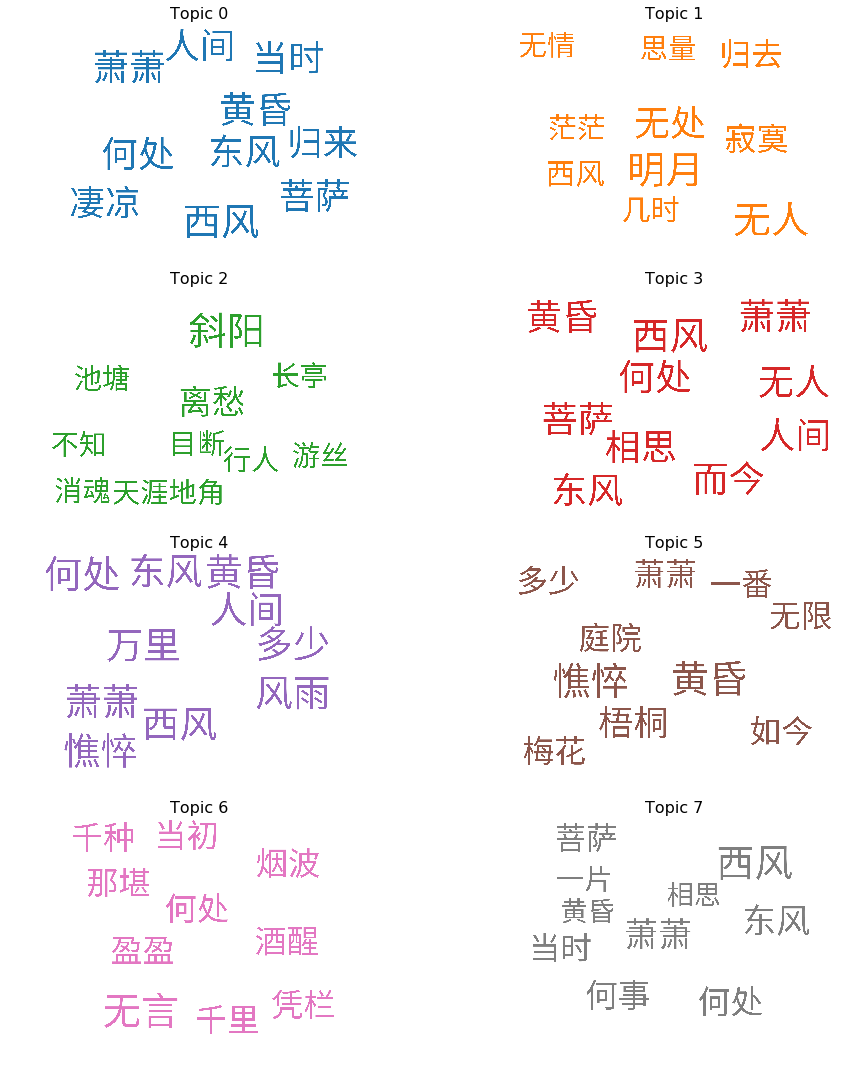

In [27]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  
#more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=stop_words,
                  font_path='/Users/tianchushu/Downloads/NotoSansCJKsc-Regular.otf',
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, random_state):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=random_state, # = set.seed
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)
#         model = gensim.models.wrappers.LdaMallet(mallet_path,
#                                               corpus=corpus,
#                                               num_topics=num_topics,
#                                               id2word=id2word,
#                                               per_word_topics=False)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        co_value = coherencemodel.get_coherence()
        coherence_values.append(co_value)
        print(num_topics, co_value)

    return model_list, coherence_values

In [29]:
%%time
# Can take a long time to run.
start = 10
limit = 45
step = 5
random_state = 30
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_nostops,
                                                        start=start, limit=limit, step=step, random_state=random_state)

10 0.2878923854433169
15 0.2805102277092718
20 0.32942668381565754
25 0.27633852459885905
30 0.2882368214406412
35 0.2841928458133046
40 0.2633599846301411
CPU times: user 14.7 s, sys: 881 ms, total: 15.6 s
Wall time: 14.4 s


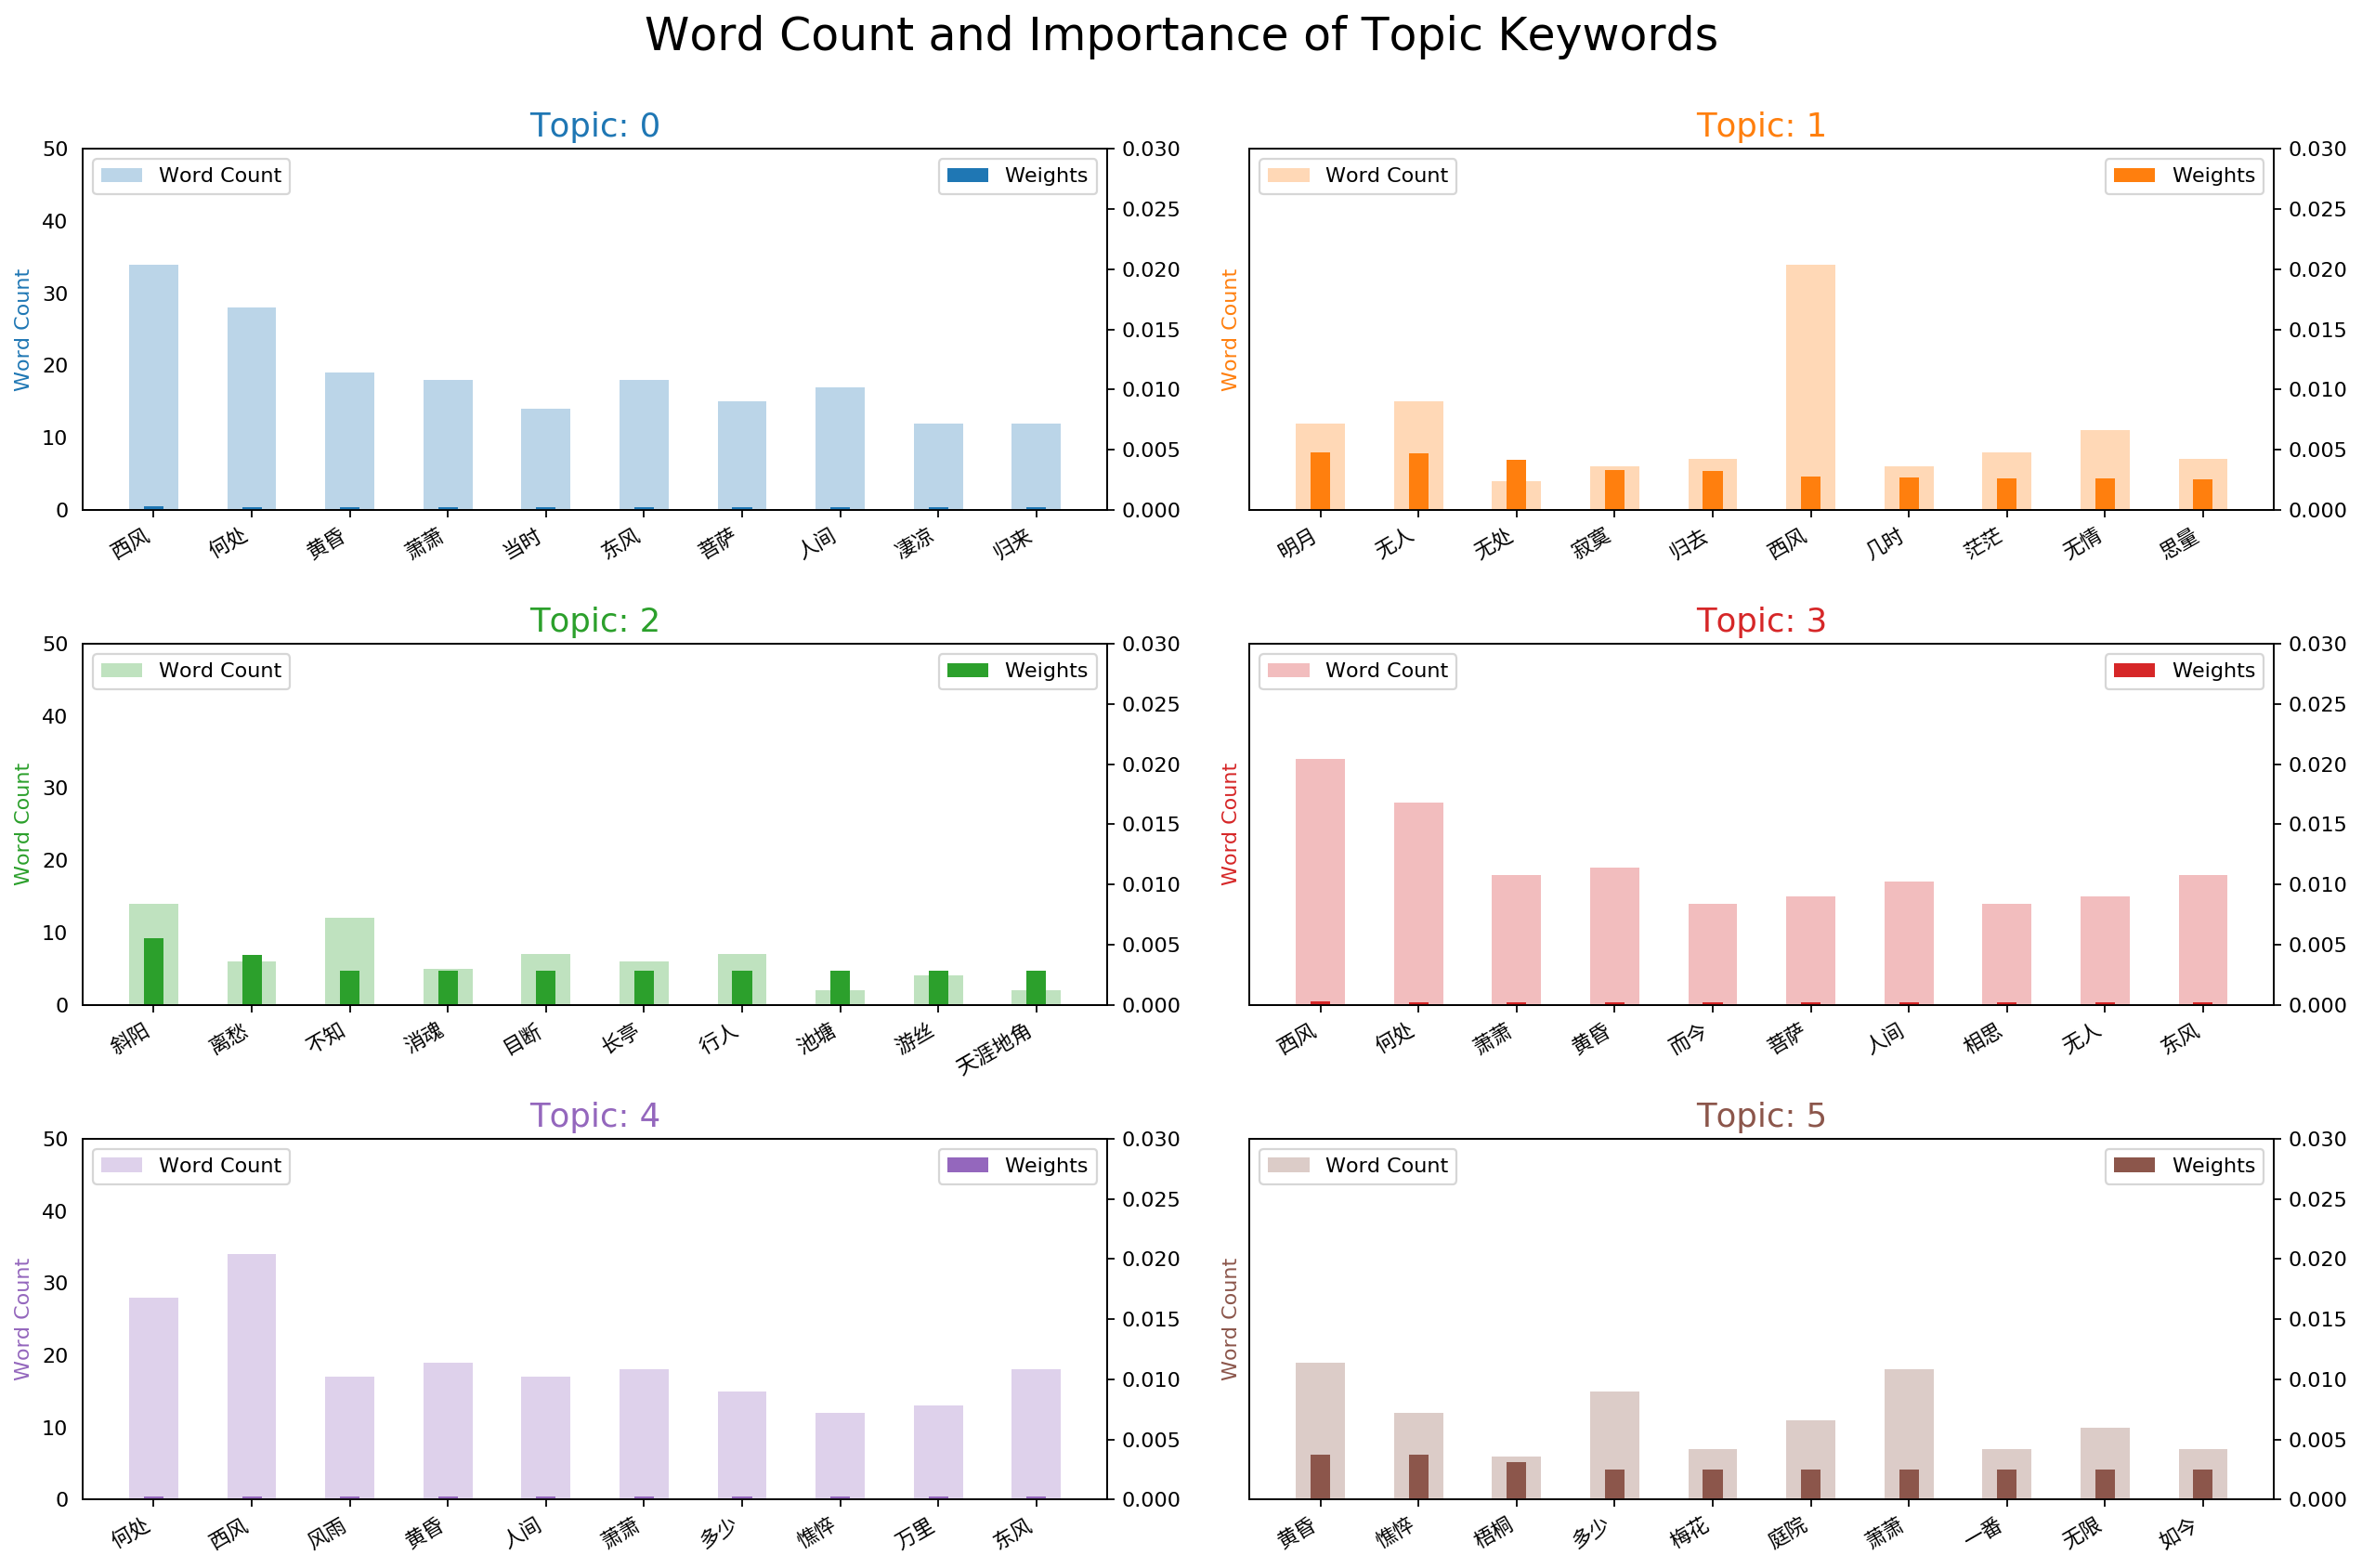

In [30]:
# -*- coding: utf-8 -*-
from collections import Counter
from matplotlib.font_manager import FontProperties
ChineseFont1 = FontProperties(fname='/Users/tianchushu/Downloads/NotoSansCJKsc-Regular.otf')


topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words_nostops for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 50)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontproperties = ChineseFont1)
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

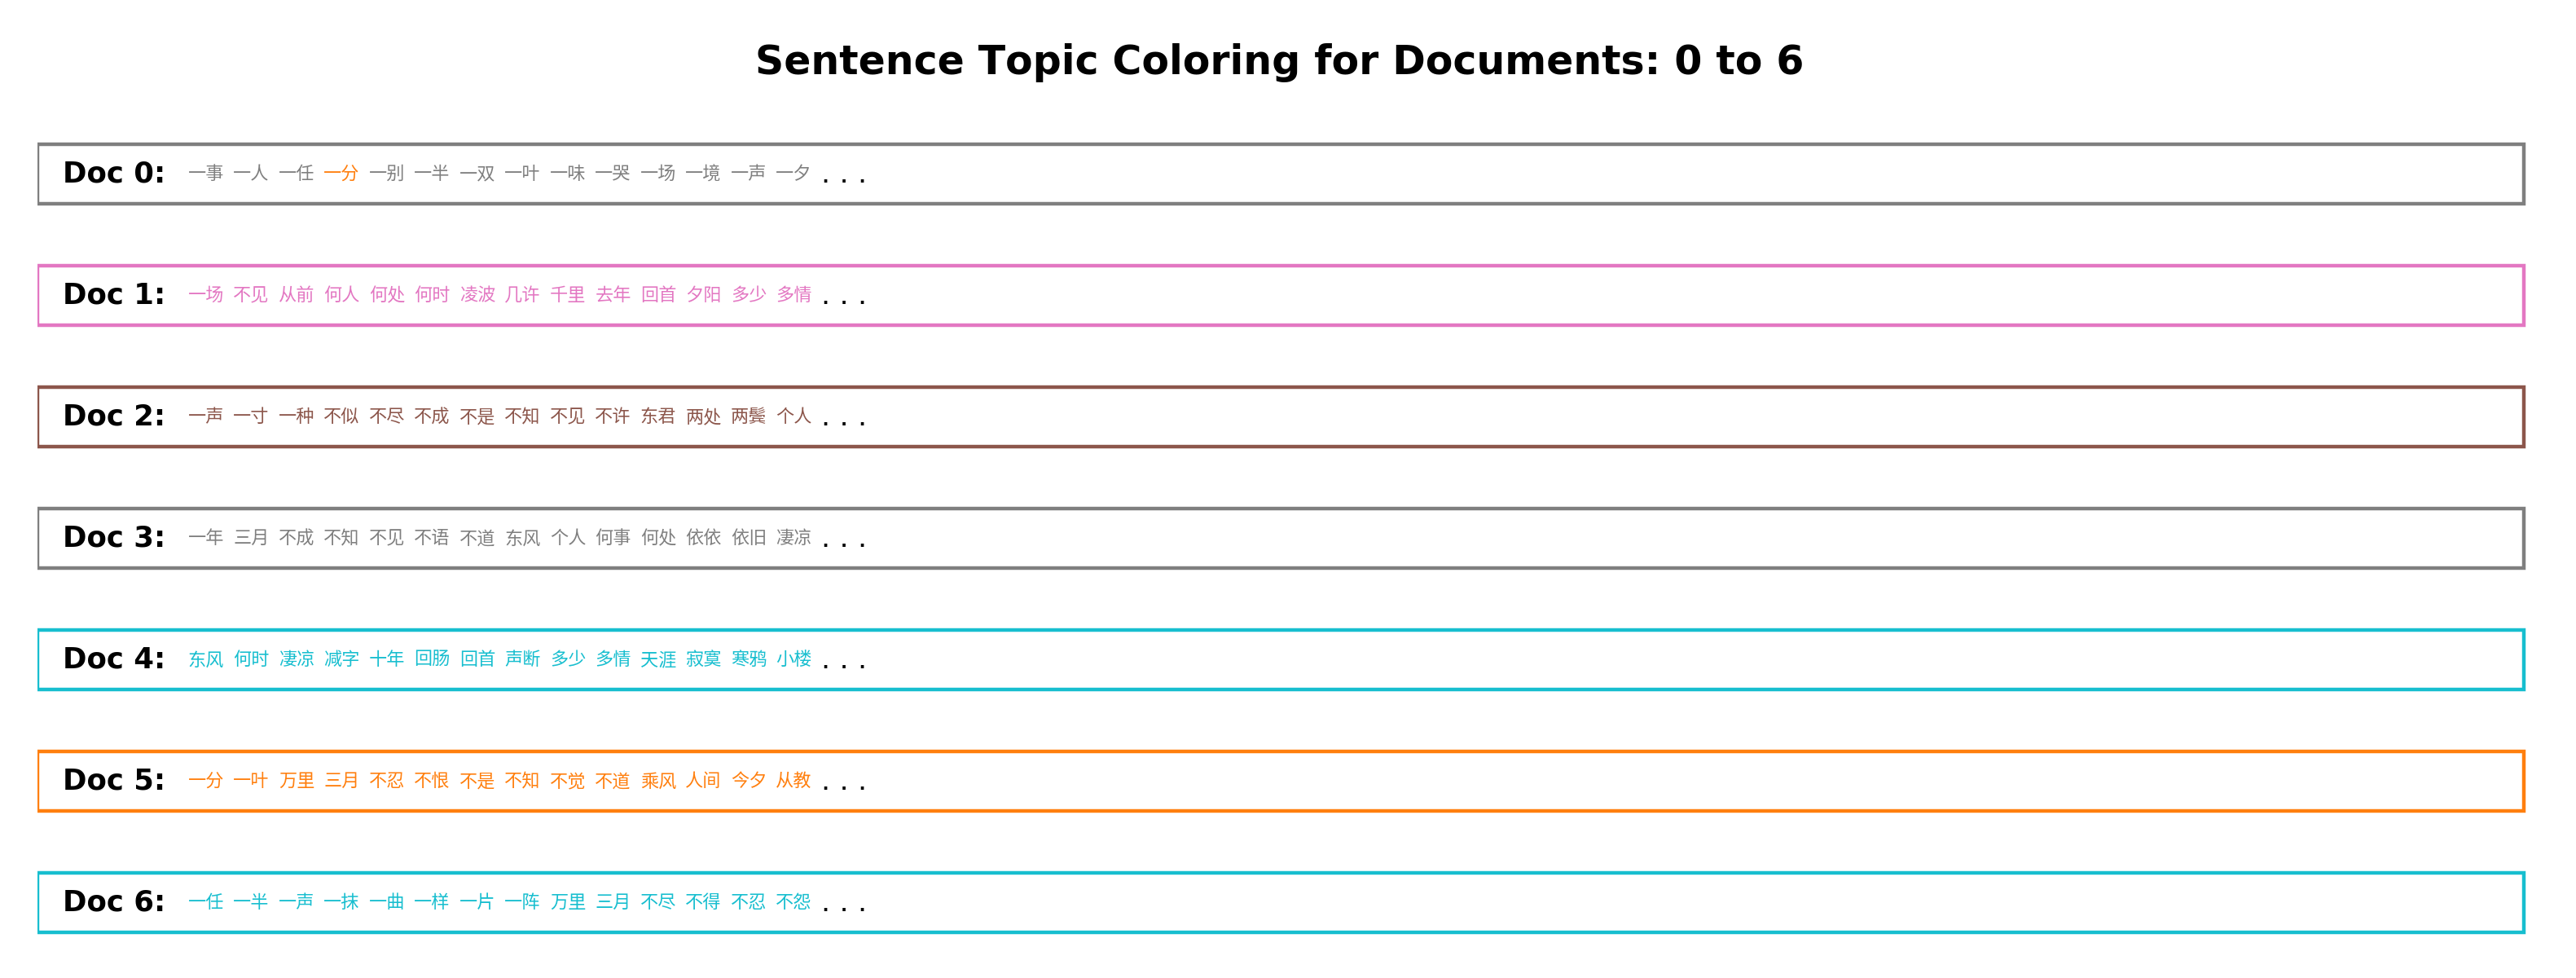

In [45]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
# -*- coding: utf-8 -*-
def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 8):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700, fontproperties = ChineseFont1)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()
    

sentences_chart()    

In [32]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


In [43]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.95]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 8 samples in 0.000s...
[t-SNE] Computed neighbors for 8 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 8 / 8
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 34.399448
[t-SNE] KL divergence after 700 iterations: 0.171907


Loading BokehJS ...

In [34]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.179955 -0.049332       1        1  37.085014
7     -0.151684 -0.100299       2        1  36.547558
5     -0.035370  0.183705       3        1  15.042344
1     -0.015497 -0.015653       4        1   4.923008
6      0.004525 -0.008945       5        1   3.250591
2      0.006011 -0.004163       6        1   3.142621
4      0.003553 -0.000995       7        1   0.002243
8      0.002809 -0.001219       8        1   0.002222
3      0.003256 -0.001421       9        1   0.002220
0      0.002442 -0.001678      10        1   0.002183, topic_info=     Category       Freq Term      Total  loglift  logprob
term                                                      
854   Default  10.000000   斜阳  10.000000  30.0000  30.0000
876   Default  10.000000   无人  10.000000  29.0000  29.0000
89    Default  15.000000   东风  15.000000  28.0000  28.0000
682   Default  11.000000   当时  11.000000  27.0000  27.0000
197   Default  22.000000   何处  22.000000  26.0000  26.0000
1598  Default  14.000000   萧萧  14.000000  25.0000  25.0000
1654  Default  27.000000   西风  27.000000  24.0000  24.0000
1511  Default  11.000000   而今  11.000000  23.0000  23.0000
914   Default   8.000000   明月   8.000000  22.0000  22.0000
194   Default  13.000000   何事  13.000000  21.0000  21.0000
497   Default   8.000000   夕阳   8.000000  20.0000  20.0000
29    Default  12.000000   一片  12.000000  19.0000  19.0000
52    Default  10.000000   万里  10.000000  18.0000  18.0000
1973  Default  15.000000   黄昏  15.000000  17.0000  17.0000
520   Default  10.000000   天涯  10.000000  16.0000  16.0000
1337  Default   6.000000   盈盈   6.000000  15.0000  15.0000
762   Default   6.000000   惆怅   6.000000  14.0000  14.0000
1928  Default  13.000000   风雨  13.000000  13.0000  13.0000
501   Default   9.000000   多情   9.000000  12.0000  12.0000
1590  Default  12.000000   菩萨  12.000000  11.0000  11.0000
1563  Default   6.000000   茫茫   6.000000  10.0000  10.0000
783   Default   9.000000   憔悴   9.000000   9.0000   9.0000
3403  Default   5.000000   万事   5.000000   8.0000   8.0000
1346  Default  11.000000   相思  11.000000   7.0000   7.0000
2951  Default   6.000000   匆匆   6.000000   6.0000   6.0000
345   Default   6.000000   功名   6.000000   5.0000   5.0000
1890  Default   6.000000   青山   6.000000   4.0000   4.0000
1240  Default   6.000000   燕子   6.000000   3.0000   3.0000
318   Default   6.000000   分明   6.000000   2.0000   2.0000
1609  Default   7.000000   落花   7.000000   1.0000   1.0000
...       ...        ...  ...        ...      ...      ...
1590  Topic10   0.000037   菩萨  12.716489  -2.0251  -8.3930
281   Topic10   0.000036   凄凉   9.876375  -1.7851  -8.4058
3199  Topic10   0.000032  古难全   0.731004   0.6882  -8.5360
152   Topic10   0.000036   人间  13.921124  -2.1230  -8.4005
661   Topic10   0.000036   庭院   9.050660  -1.7111  -8.4191
194   Topic10   0.000036   何事  13.291448  -2.0861  -8.4098
1346  Topic10   0.000036   相思  11.543144  -1.9527  -8.4174
885   Topic10   0.000035   无情   7.782012  -1.5779  -8.4370
318   Topic10   0.000035   分明   6.972653  -1.4729  -8.4418
497   Topic10   0.000035   夕阳   8.292726  -1.6408  -8.4363
71    Topic10   0.000035   不成   6.980431  -1.4765  -8.4442
12    Topic10   0.000035   一声   6.962060  -1.4742  -8.4446
896   Topic10   0.000035   无限   7.671377  -1.5674  -8.4407
817   Topic10   0.000032   指点   0.829436   0.5668  -8.5311
3240  Topic10   0.000032   幽独   0.731052   0.6878  -8.5364
3165  Topic10   0.000032   三分   0.731244   0.6873  -8.5366
29    Topic10   0.000035   一片  12.218884  -2.0182  -8.4261
1922  Topic10   0.000035   风流   8.656177  -1.6894  -8.4420
500   Topic10   0.000035   多少  11.890405  -1.9977  -8.4328
901   Topic10   0.000035   旧时   8.322623  -1.6539  -8.4457
1843  Topic10   0.000035   阑干   8.105235  -1.6284  -8.4468
501   Topic10   0.000035   多情   9.426438  -1.7750  -8.4424
1352  Topic10   0.000034   相逢   5.650589  -1.2793  -8.4584
84   

In [35]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [36]:
# Visualize
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[4], corpus, id2word)  # sort=False ? sort=True
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.110207  0.137239       1        1  33.588135
10    -0.021192  0.257535       2        1  19.956545
25    -0.278903 -0.018153       3        1  18.595621
23     0.150382 -0.145168       4        1  13.099962
24    -0.031774 -0.039571       5        1   4.548056
2      0.001190 -0.042511       6        1   3.568415
28    -0.106582 -0.062303       7        1   3.134938
4      0.013567 -0.000096       8        1   2.739080
13     0.020258 -0.011511       9        1   0.700020
20     0.006260 -0.005107      10        1   0.017014
21     0.005376 -0.003920      11        1   0.002754
6      0.007647 -0.004231      12        1   0.002719
29     0.006323 -0.002642      13        1   0.002711
27     0.005751 -0.003767      14        1   0.002685
19     0.006344 -0.003619      15        1   0.002684
8      0.006807 -0.003591      16        1   0.002677
9      0.007055 -0.003904      17        1   0.002675
22     0.007124 -0.003530      18        1   0.002604
5      0.006130 -0.003991      19        1   0.002602
26     0.007152 -0.003751      20        1   0.002601
3      0.006966 -0.003532      21        1   0.002596
0      0.007348 -0.003633      22        1   0.002595
11     0.007187 -0.003593      23        1   0.002592
18     0.006888 -0.003442      24        1   0.002592
16     0.006839 -0.003236      25        1   0.002585
14     0.007417 -0.002781      26        1   0.002579
17     0.007346 -0.003567      27        1   0.002573
1      0.006616 -0.003273      28        1   0.002498
7      0.007177 -0.003239      29        1   0.002495
15     0.007097 -0.003113      30        1   0.002390, topic_info=     Category       Freq Term      Total  loglift  logprob
term                                                      
1654  Default  40.000000   西风  40.000000  30.0000  30.0000
1598  Default  18.000000   萧萧  18.000000  29.0000  29.0000
29    Default  17.000000   一片  17.000000  28.0000  28.0000
89    Default  19.000000   东风  19.000000  27.0000  27.0000
197   Default  31.000000   何处  31.000000  26.0000  26.0000
1590  Default  16.000000   菩萨  16.000000  25.0000  25.0000
194   Default  16.000000   何事  16.000000  24.0000  24.0000
1511  Default  17.000000   而今  17.000000  23.0000  23.0000
52    Default  17.000000   万里  17.000000  22.0000  22.0000
152   Default  20.000000   人间  20.000000  21.0000  21.0000
497   Default  11.000000   夕阳  11.000000  20.0000  20.0000
682   Default  14.000000   当时  14.000000  19.0000  19.0000
876   Default  16.000000   无人  16.000000  18.0000  18.0000
892   Default  11.000000   无聊  11.000000  17.0000  17.0000
1973  Default  20.000000   黄昏  20.000000  16.0000  16.0000
1928  Default  20.000000   风雨  20.000000  15.0000  15.0000
1755  Default  10.000000   那堪  10.000000  14.0000  14.0000
520   Default  12.000000   天涯  12.000000  13.0000  13.0000
854   Default  13.000000   斜阳  13.000000  12.0000  12.0000
345   Default  10.000000   功名  10.000000  11.0000  11.0000
1560  Default  10.000000   英雄  10.000000  10.0000  10.0000
1922  Default  12.000000   风流  12.000000   9.0000   9.0000
363   Default  11.000000   千里  11.000000   8.0000   8.0000
1890  Default  10.000000   青山  10.000000   7.0000   7.0000
318   Default   8.000000   分明   8.000000   6.0000   6.0000
12    Default   8.000000   一声   8.000000   5.0000   5.0000
1346  Default  15.000000   相思  15.000000   4.0000   4.0000
501   Default  12.000000   多情  12.000000   3.0000   3.0000
3403  Default   9.000000   万事   9.000000   2.0000   2.0000
466   Default  14.000000   回首  14.000000   1.0000   1.0000
...       ...        ...  ...        ...      ...      ...
1598  Topic30   0.000041   萧萧  18.735273  -2.3922  -8.3727
197   Topic30   0.000041   何处  31.610409  -2.9108  -8.3681
89    Topic30   0.000040   东风  19.536493  -2.4539  -8.3924
1511  Topic30   0.000039   而今  17.902296  -2.3837  -8.4096
152   Topic30   0.000039   人间  20.745865  -2.5

## most similar words for 5 chosen words 

In [37]:
from gensim.models import word2vec, Phrases
from gensim.models.phrases import Phraser

trigram_sentences_project = []

for sent in data_words_nostops:
    bigrams_ = bigram[sent]
    trigrams_ = trigram[bigram[sent]]
    trigram_sentences_project.append(trigrams_)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 1    # Minimum word count                        
num_workers = 20      # Number of threads to run in parallel
context = 5           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words


model = word2vec.Word2Vec(trigram_sentences_project, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

vocab = list(model.wv.vocab.keys())
print(vocab[:10])

['金缕', '曲亡妇', '忌日', '有感', '此恨', '何时', '空阶', '葬花', '天气', '三载']


In [38]:
model.wv.vocab

{'金缕': <gensim.models.keyedvectors.Vocab at 0x1301dc978>,
 '曲亡妇': <gensim.models.keyedvectors.Vocab at 0x1301dc320>,
 '忌日': <gensim.models.keyedvectors.Vocab at 0x1301dc940>,
 '有感': <gensim.models.keyedvectors.Vocab at 0x1301dc668>,
 '此恨': <gensim.models.keyedvectors.Vocab at 0x1301dc5f8>,
 '何时': <gensim.models.keyedvectors.Vocab at 0x1301dc6a0>,
 '空阶': <gensim.models.keyedvectors.Vocab at 0x1301dce48>,
 '葬花': <gensim.models.keyedvectors.Vocab at 0x1302026a0>,
 '天气': <gensim.models.keyedvectors.Vocab at 0x130202908>,
 '三载': <gensim.models.keyedvectors.Vocab at 0x1302022b0>,
 '悠悠': <gensim.models.keyedvectors.Vocab at 0x130202160>,
 '梦久': <gensim.models.keyedvectors.Vocab at 0x130202080>,
 '应醒': <gensim.models.keyedvectors.Vocab at 0x130202470>,
 '人间': <gensim.models.keyedvectors.Vocab at 0x130202198>,
 '无味': <gensim.models.keyedvectors.Vocab at 0x1302022e8>,
 '不及': <gensim.models.keyedvectors.Vocab at 0x130202390>,
 '夜台': <gensim.models.keyedvectors.Vocab at 0x130202780>,
 '尘土': <gensi

In [39]:
model.wv.most_similar (positive='西风')

[('一个', 0.24625752866268158),
 ('意溪山', 0.23501378297805786),
 ('波浪', 0.2334124594926834),
 ('初秀', 0.2304997444152832),
 ('屏山', 0.2212245762348175),
 ('香浮', 0.21901457011699677),
 ('前人', 0.2185710370540619),
 ('明珠', 0.21447113156318665),
 ('武陵春', 0.2091750055551529),
 ('晚日', 0.20893850922584534)]

In [46]:
model.wv.most_similar (positive='东风')

[('单于', 0.2904261350631714),
 ('不如归去', 0.2717800736427307),
 ('乍试', 0.2471722960472107),
 ('浓云', 0.2346329391002655),
 ('披衣', 0.2270820289850235),
 ('将军', 0.22556203603744507),
 ('如三鼓', 0.21433061361312866),
 ('系花', 0.21429480612277985),
 ('玉兔', 0.20463493466377258),
 ('歌台', 0.19914895296096802)]

In [40]:
model.wv.most_similar (positive='萧萧')

[('独宿', 0.28754180669784546),
 ('根芽', 0.28697311878204346),
 ('会解', 0.26062411069869995),
 ('峥嵘', 0.24300718307495117),
 ('渐酒', 0.2280900478363037),
 ('鸿雁', 0.21932673454284668),
 ('得人怜', 0.2179030179977417),
 ('有美人', 0.21384841203689575),
 ('立尽', 0.2125294804573059),
 ('绝塞', 0.20669245719909668)]

In [41]:
model.wv.most_similar (positive='不语')

[('莫道', 0.2880532741546631),
 ('哀乐', 0.23700618743896484),
 ('宝钗分', 0.22841157019138336),
 ('独语', 0.21598023176193237),
 ('应是', 0.21558572351932526),
 ('忽见', 0.21330752968788147),
 ('攻名', 0.21305720508098602),
 ('惊去', 0.21304425597190857),
 ('青雀', 0.21246740221977234),
 ('旧知', 0.20726008713245392)]

In [47]:
model.wv.most_similar (positive='黄昏')

[('风絮', 0.22456154227256775),
 ('自古', 0.21670912206172943),
 ('卷地', 0.20932474732398987),
 ('朗月清风', 0.20312470197677612),
 ('双环', 0.19900955259799957),
 ('此景', 0.19853582978248596),
 ('清风', 0.19811005890369415),
 ('难逢', 0.19636672735214233),
 ('不许', 0.19616496562957764),
 ('中壁', 0.1938595175743103)]